# Discrimination in Tennis: An Examination of Age and Territorial Biases

DSCI 100 \
*Team Members: Aleyna, Camille, Erik, Yulong*

#### *INTRODUCTION*

Tennis has been an integral sport within the world since 1890. Many global tournaments are held each year in major cities such as Melbourn,
Paris, London, and New York City, with prize pools of over 50 million! Given this sport with such historical value and a global presence, 
we wanted to explore any **potential biases** through **age** or **country of origin** within the international tennis community. We achieve this by
examining a dataset of the top 500 tennis players in the world, and visualizing money per player through age group and country of origin. 

***Our Question:*** Can the top ranking countries and the varying ages between tennis players be used to predict their competition winnings, and does this reveal an underlying partiality between the factors?

***Classifier:*** Earnings\
***Predictors:*** Country, Age, Ranks\
***Dataset:*** Tennis Player Stats for Top 500 Players

#### *PRELIMINARY EXPLORATORY DATA ANALYSIS*


In [39]:
library(tidyverse)
library(repr)
library(tidymodels)
library(stringr)
set.seed(2022)

In [40]:
data <- read.csv(url("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"))

In [41]:
data <- mutate(data, str_replace(data$Age, " \\s*\\([^\\)]+\\)", ""))
data <- mutate(data, Age = str_replace(data$Age, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Current.Rank = str_replace(data$Current.Rank, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Best.Rank = str_replace(data$Best.Rank, " \\s*\\([^\\)]+\\)", ""))

money <- c(data$Prize.Money)
money <- money %>%
        lapply(gsub, pattern="$", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="US", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="All-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="11th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="10th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="14th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="2nd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="27th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="30th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="4th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="28th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="6th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="33rd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="26th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="48th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="41st", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="")

data_selected <- data %>%
            mutate(data, Prize.Money = money) %>%
            select(Age, Name,Country, Current.Rank, Best.Rank, Prize.Money,Seasons) %>%
            mutate(Prize.Money = gsub(",","", Prize.Money))

tidy_data <- data_selected %>% 
        filter(Prize.Money != "") %>%
        mutate(Prize.Money = as.numeric(Prize.Money)) %>%
        mutate(Age = as.numeric(Age)) %>%
        mutate(Current.Rank = as.numeric(Current.Rank)) %>%
        mutate(Best.Rank = as.numeric(Best.Rank)) %>%
        mutate(Seasons = as.numeric(Seasons)) %>%
        mutate(Prize.Money = Prize.Money/Seasons)

tidy_data_nosplit <- drop_na(tidy_data)

Warning message:
“Problem with `mutate()` input `Prize.Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize.Money` is `as.numeric(Prize.Money)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


In [42]:
tidy_data <- initial_split(tidy_data_nosplit, prop = 0.75, strata = Prize.Money)  
training_data <- training(tidy_data)   
testing_data <- testing(tidy_data)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

New names:
* NA -> ...3



Country,n,avg_award_in_USD
<chr>,<int>,<dbl>
United Kingdom,7,745227.6
Argentina,8,454643.2
Serbia,8,360795.9
Japan,10,320105.2
Australia,13,278131.9
France,15,459706.8
Spain,19,652559.6
Italy,20,314682.0
Germany,21,222830.4


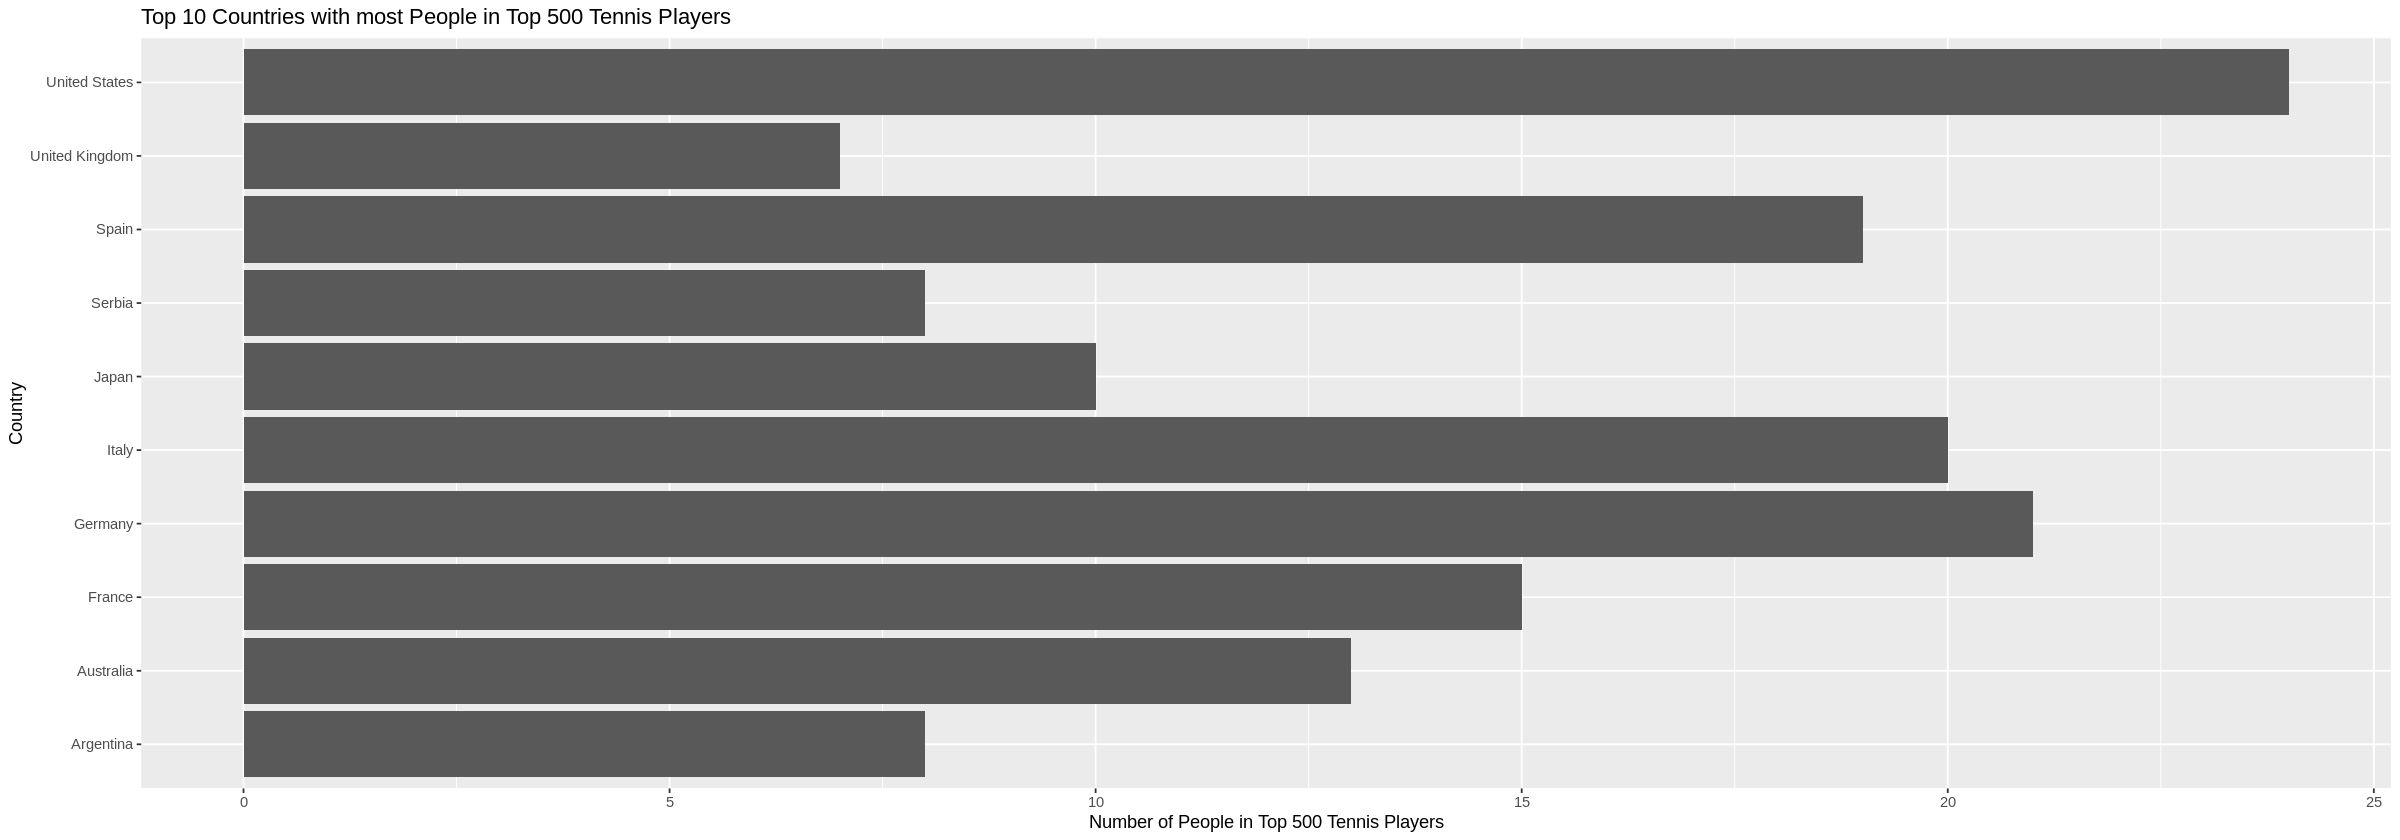

In [43]:
# Find average prize money for each country's players
table1 <- training_data %>%
    group_by(Country) %>%
    summarize(avg_award_in_USD = mean(Prize.Money)) 

avg_award_in_USD <- table1$avg_award_in_USD

# count each country's number of players and then bind the data with the average prize money column from above
final_table <- training_data %>%
    group_by(Country) %>%
    summarize(n = n()) %>%
    bind_cols(avg_award_in_USD) %>%
    mutate(avg_award_in_USD = ...3) %>%
    select(-...3)

# Find top 10 country with the most players
top_10 <- final_table %>%
        arrange(n) %>%
        tail(10)

# Plot the number of players for each top 10 country
top_10_graph <- ggplot(top_10,aes(x = Country, y = n)) +
        geom_bar(stat = "identity") +
        labs(x = "Country", y = "Number of People in Top 500 Tennis Players") +
        ggtitle("Top 10 Countries with most People in Top 500 Tennis Players") +
        coord_flip()

top_10_graph

# Final "top 10" table with player counts and average prize money
tibble(top_10)

top_10_names <- pull(top_10, Country)


In [51]:
# Start working on Top 10
top_10_data <- filter(tidy_data_nosplit, Country == "United States"| Country == "United Kingdom" | Country == "Spain" | 
                     Country == "Russian Federation" | Country == "Japan" | Country == "Italy" |
                     Country == "Germany" | Country == "France" | Country == "Australia"| Country == "Argentina")
top_10_data
tennis_data <- initial_split(top_10_data, prop = 0.75, strata = Prize.Money)  
training_data <- training(tennis_data)   
testing_data <- testing(tennis_data)

Age,Name,Country,Current.Rank,Best.Rank,Prize.Money,Seasons
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
27,Bernard Tomic,Australia,183,17,553815.55,11
28,Sekou Bangoura,United States,307,213,278709.00,1
23,Daniil Medvedev,Russian Federation,4,4,2101538.60,5
31,Juan Martin Del Potro,Argentina,121,3,1849256.14,14
22,Marc Polmans,Australia,133,132,253648.50,2
22,Taylor Harry Fritz,United States,34,25,453719.00,6
33,Marcel Granollers,Spain,130,19,772940.57,14
32,Sam Querrey,United States,45,11,794143.47,15
30,Roberto Marcora,Italy,172,171,184328.00,1


In [52]:

# Our model
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
      set_engine("kknn") %>%
      set_mode("regression") 

# Our recipe
tennis_recipe <- recipe(Prize.Money ~ ., data = training_data) %>%
      step_rm(Name,Country) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors()) 

In [53]:
# Cross-validation
tennis_vfold <- vfold_cv(training_data, v = 5, strata = Prize.Money)

# Workflow
tennis_workflow <- workflow() %>%
     add_recipe(tennis_recipe) %>%
     add_model(tennis_spec)

# Find k value
tennis_k_min <- tennis_workflow %>%
      tune_grid(resamples = tennis_vfold, grid = 10) %>%
      collect_metrics() %>%
      filter(.metric == "rmse") %>%
      arrange(mean) %>%
      slice(1) %>%
      pull(neighbors)

In [54]:
# set up a model with k = tennis_k_min
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tennis_k_min) %>%
        set_engine("kknn") %>%
        set_mode("regression")

# final fit
final_fit <- workflow() %>%
        add_recipe(tennis_recipe) %>%
        add_model(final_spec) %>%
        fit(data= training_data)

# predict on the test set
predicted_result <- final_fit %>%
        predict(testing_data) %>%
        bind_cols(testing_data)

#predicted_result

# RMSPE (accuracy) of Prediction
RMSPE <- predicted_result %>%
        metrics(truth = Prize.Money, estimate = .pred)

#RMSPE
training_data

,Age,Name,Country,Current.Rank,Best.Rank,Prize.Money,Seasons
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,28,Sekou Bangoura,United States,307,213,278709.00,1
3,23,Daniil Medvedev,Russian Federation,4,4,2101538.60,5
4,31,Juan Martin Del Potro,Argentina,121,3,1849256.14,14
7,33,Marcel Granollers,Spain,130,19,772940.57,14
8,32,Sam Querrey,United States,45,11,794143.47,15
9,30,Roberto Marcora,Italy,172,171,184328.00,1
11,32,Fabio Fognini,Italy,12,9,841913.38,16
13,27,Agustin Velotti,Argentina,384,166,59712.00,4
14,22,Yusuke Takahashi,Japan,432,238,62529.00,1


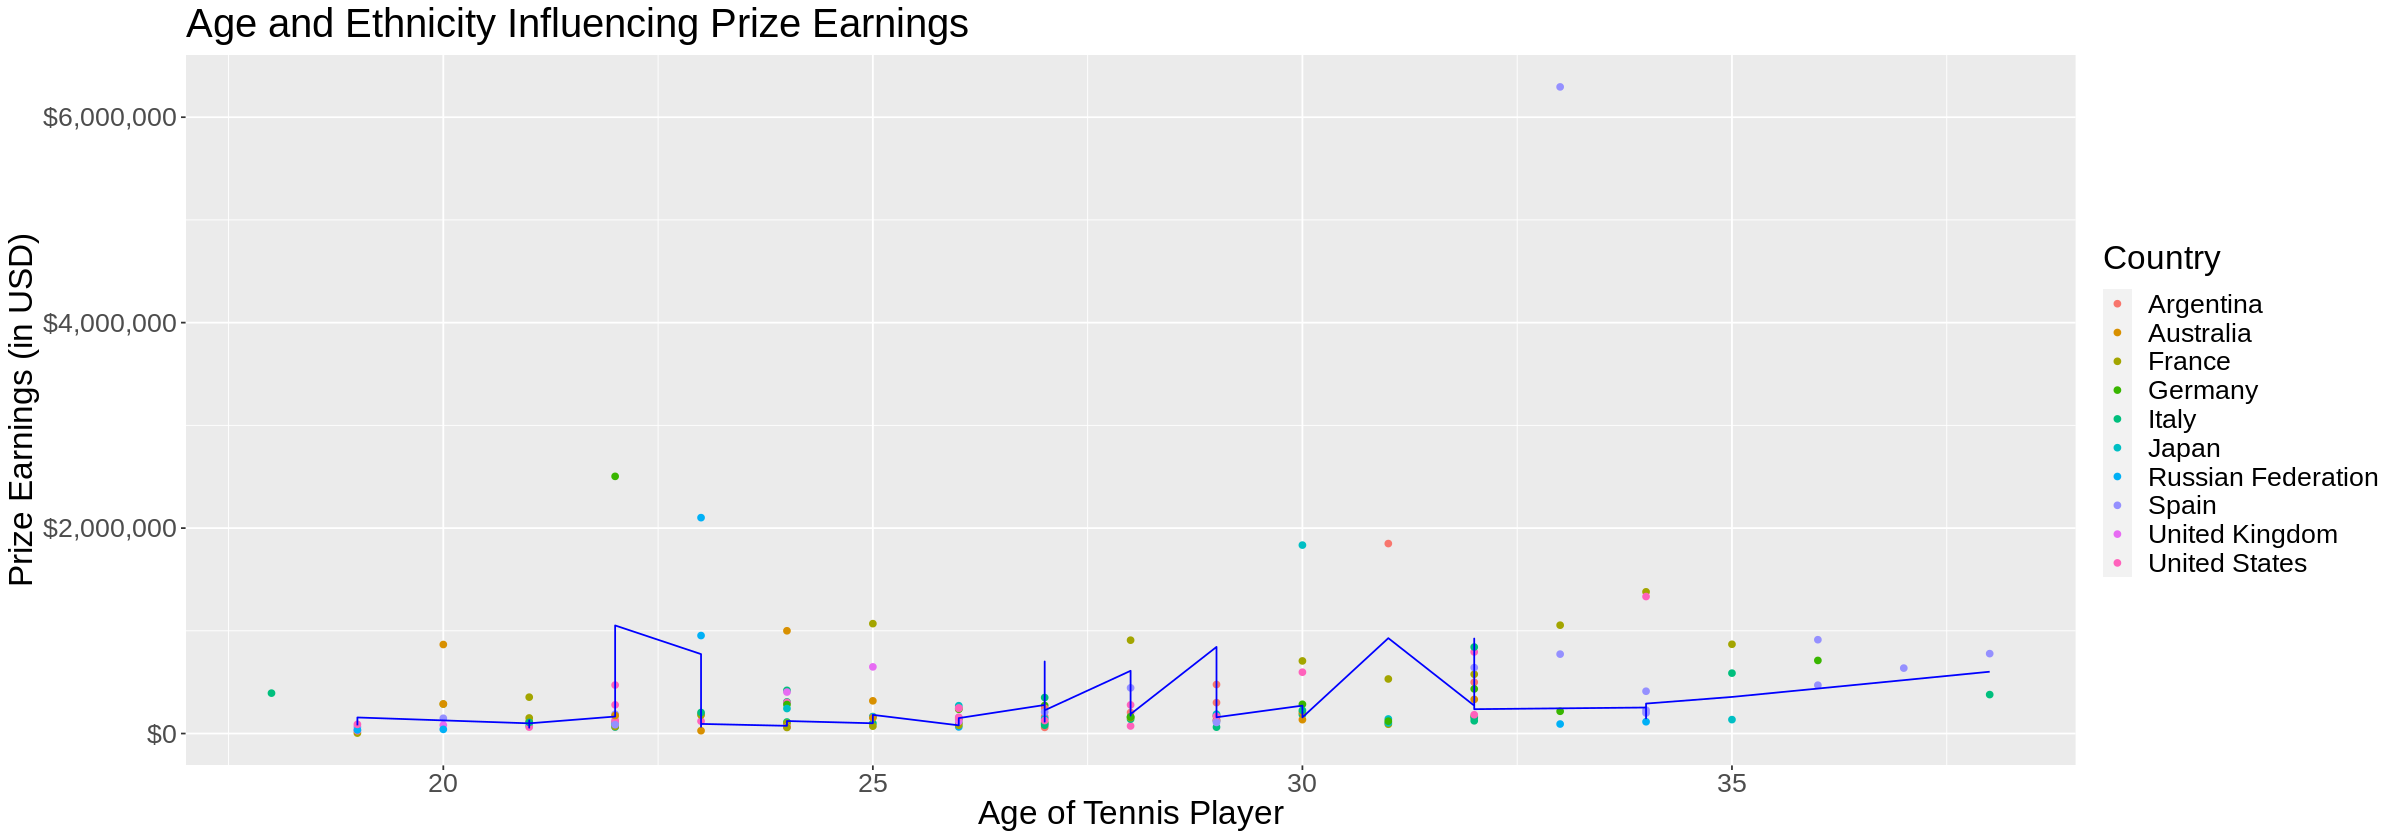

In [55]:
# Graph using train_data for scatter points and predicted_result for prediction line
options(repr.plot.width = 20, repr.plot.height = 7)
tennis_final_plot <- ggplot(training_data, aes(x = Age, y = Prize.Money, color = Country)) +
        geom_point(size = 1.5) +
        geom_line(data = predicted_result,
                 mapping = aes(x = Age, y = .pred),
                  color = "blue") +
        labs(x = "Age of Tennis Player", y = "Prize Earnings (in USD)", color = "Country") +
        scale_y_continuous(labels = dollar_format()) +
        ggtitle("Age and Ethnicity Influencing Prize Earnings") +
        theme(text = element_text(size = 20))

tennis_final_plot

`summarise()` ungrouping output (override with `.groups` argument)



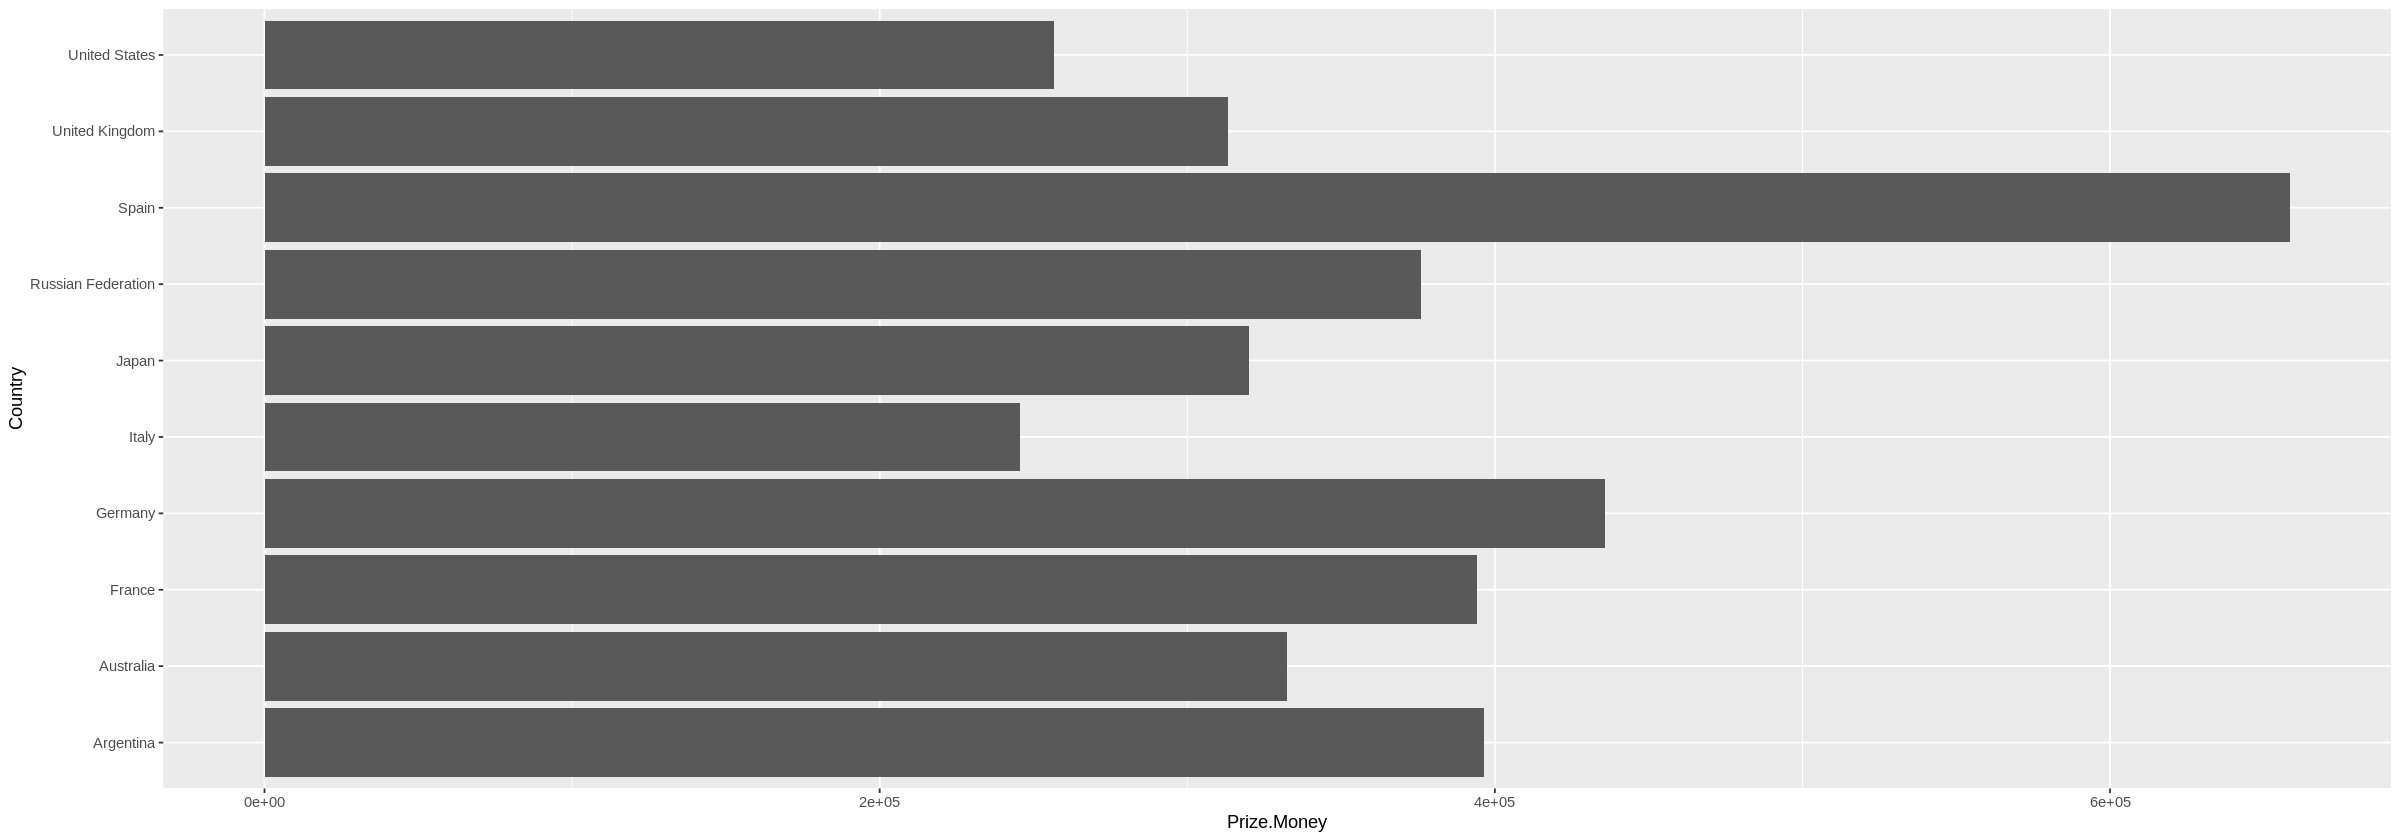

In [56]:
# Graph for Country vs Money

Country_vs_Money_data <- training_data %>%
    group_by(Country) %>%
    summarize(Prize.Money = mean(Prize.Money))

Country_vs_Money <- ggplot(Country_vs_Money_data, aes(x = Prize.Money, y = Country)) +
    geom_bar(stat = "identity")

Country_vs_Money

#### *METHODS*
We strive to discover the significance of the country of origin and age of a tennis player when looking at their chances to win prizes. To achieve this goal, we will examine how many players there are per country and their age, and compare it with the amount of money made per country.

We will use the **country column** to derive how many players there are per country, then the **age and prize money columns** to assess the correlation between the variables. In order to reduce bias, we will compare the **average ranking** of all the players in  countries when drawing conclusions.

We will use **histograms** to visualize how much money different age groups make, and **bar graphs** to visualize how much money different countries make. 

#### *EXPECTED OUTCOMES AND SIGNIFICANCE*

***What do you expect to find?*** \
Knowing the US's competitive nature, we expect **US players** to earn the most prize money out of all the countries given in our data set. We also expect **younger players** to make more overall given their potential.

***What impact could such findings have?*** \
Obtaining evidence on the top earning players’ ethnicity could reveal potential **biases** or underlying **discrimination** towards a country in tennis. As more research is done towards sport-related biases (such as age and ethnicity), we hope that the insights provided by research can aspire the sports industry to make **fair** and **inclusive** sporting events for all players. In the perspective of tennis coaches, this data could be used to recruit prospective tennis players.

***What future questions could this lead to?***
Since our data analysis is only limited to tennis, it poses the question if other sports, such as soccer, football, and baseball, **have the same biases?** If not, what other predictors would have more weight than predictors used in our predicting model? 

#### *IMPACT*

The impact of our findings are significant in a variety of different ways, across all sports, not just tennis:

1. A lack of diversity in countries will lead to repetative, boring play. 

If there is inequality in pay across countries, the countries with the most earning will more likely to be the ones who have more players as well as stronger players, allowing them to flourish. However, similar countries will simply use their past experience and strategies, which allows no room for innovation, as well as the same strategies over and over on the world stage. This can be avoided by introducing methods to allow more equal pay across countries, allowing for new countries to compete and innovate. 

2. Older players will eventually retire, thus overpaying them could ruin future generations

As we can see, older players tend to be paid more up to a certain range, which might seem fine considering that they play better. However, if there is not more balance, new players could be discouraged from joining, or encouraged to simply join the sport when they are older. This, clearly, is not ideal, as it simply lowers the supply of players as well as significanlty lowering the quality of the players who do end up playing. 

3. A new path forwards for future research

Our study reveals inherent bias within major parts of tennis, and this is important as it reaveals a new direction in which inequality is found, and hopefully solutions will soon arise for all the different sports across the world. 


